In [128]:

#### GLOBAL JOHN HOPKINS DATASETS
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed='https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths='https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

### ARGENTINA DATASETS

arg_confirmed = 'https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/COVID19_Confirmed.csv'
arg_deaths ='https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/COVID19_Deaths.csv'
arg_evolution = 'https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/COVID19_Evolution.csv'
arg_lookup_table = 'https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/Lat_Long_Provincias_Argentinas.csv'
arg2_geojson = 'https://raw.githubusercontent.com/GIBD/covid/master/data/ar-all.geo.json'

arg2_total = 'https://github.com/GIBD/covid/raw/master/data/argentina.csv'
arg2_arg = 'https://github.com/GIBD/covid/raw/master/data/COVID_Arg.csv'
arg2_deaths = 'https://github.com/GIBD/covid/raw/master/data/fallecidos.csv'
arg2_poblacion ='https://github.com/GIBD/covid/raw/master/data/poblacionArg.csv'
latam_geojson = 'https://raw.githubusercontent.com/GIBD/covid/master/data/south-america.geo.json'

In [129]:
from __future__ import unicode_literals  # or use u"unicode strings"
import numpy as np
import scipy as sc
from scipy.stats import norm

import matplotlib
#matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt
import pandas as pd
import requests, io

print('reading time series')
s=requests.get(url).content

df=pd.read_csv(io.StringIO(s.decode('utf-8')))

def process_x(mydata):
    date = []
    count = []
    for x in mydata.columns[43:].to_list():
        date.append(x)
        count.append( mydata[x].values[0] )

    d = {'date': date, 'count': count}
    df4 = pd.DataFrame(data=d)
    df4 = df4[4:]
    df4['date'] = pd.to_datetime(df4['date'],format='%m/%d/%y')
    df4['date'] = df4['date'].dt.strftime('%m/%d/%y')
    return df4

print('OK')
_arg = df.loc[df['Country/Region'] == 'Argentina']
_us = df.loc[df['Country/Region'] == 'US']

_a = process_x(_arg)
_us = process_x(_us)
pd.set_option('float_format', '{:f}'.format)

reading time series
OK


In [130]:
print("Argentina\n", _a.describe())

Argentina
             count
count   66.000000
mean  1969.272727
std   1812.202430
min      1.000000
25%    185.000000
50%   1591.000000
75%   3362.250000
max   5776.000000


In [131]:
print("US\n", _us.describe())

US
                count
count      66.000000
mean   476722.893939
std    446018.647314
min       217.000000
25%     27519.000000
50%    381719.000000
75%    861965.250000
max   1309550.000000


In [132]:
series = {'date': _a['date'].to_list(), 'arg': _a['count'].to_list(), 'us': _us['count'].to_list()}
rr = pd.DataFrame(series, columns=['date', 'arg'])
#rr = pd.DataFrame(series, columns=['date', 'us'])

jump = 7
s = rr['arg'][jump:] #numero de tests a saltear
#print(s)
_len = len(s)
cumsum = s.sum()  # sum function is wrong

#mu=12;sigma=0.25
mu = cumsum/s.size
#mean =  (s-mu)**2
#mean = np.mean(s, axis=1)
mean = rr.mean()[0]
variance = np.var(s, ddof=1)
#variance = rr.var()[0]
#variance = (1/_len) * s.max()# Its wrong as its a cumulative sum
sigma = np.sqrt(variance)

print("mu = ", mu)
print("mean = ", mean)
print("variance = ", variance)
print("sigma = ", sigma)

print ("Mu - Mean < 0.01", abs(mu - np.mean(s)) < 0.01   )# must be true
print ("Sigma - Std < 0.01", abs(sigma - np.std(s, ddof=1)) < 0.01  ) # must be true

mu =  2201.7118644067796
mean =  1969.2727272727273
variance =  3162237.6224430157
sigma =  1778.2681525695207
Mu - Mean < 0.01 True
Sigma - Std < 0.01 True


<Figure size 1080x432 with 0 Axes>

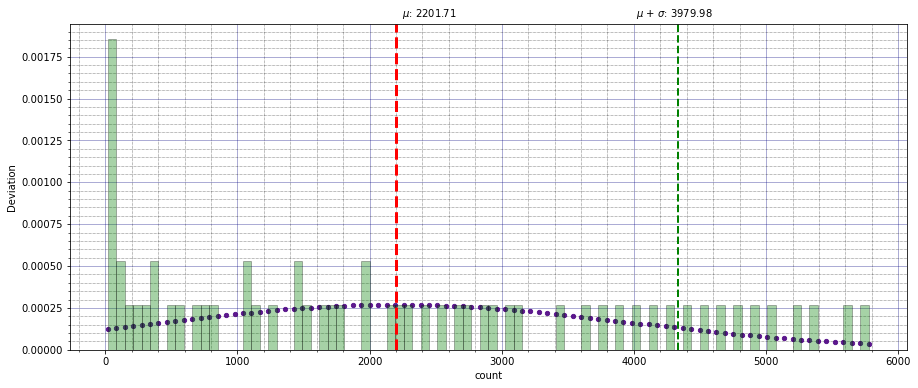

In [135]:
plt.rcParams["figure.figsize"]=15,6
#df = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1]})

plt.tight_layout()
fig, ax = plt.subplots()

count, bins, ignored = ax.hist(s, bins= 90, density=True, stacked=True, cumulative=False, alpha=0.35, lw=0.8, edgecolor='black', color='green')

#print(count)
#print(ignored)

oneS = 1.2
onesigma = oneS/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

df = pd.DataFrame({'count': bins, 'Deviation': onesigma })
df.plot(kind='scatter', x='count', y='Deviation', ax=ax, alpha=0.9, lw=0.8, color='indigo')

min_ylim, max_ylim = plt.ylim()
ax.axvline(mu, color='red', linestyle='dashed', linewidth=3)
plt.text(mu*1.02, max_ylim*1.02, '$\mu$: {:.2f}'.format(mu))

ax.axvline(mu+sigma*oneS, color='green', linestyle='dashed', linewidth=2)
plt.text(mu+sigma*1.02, max_ylim*1.02, '$\mu$ + $\sigma$: {:.2f}'.format(mu+sigma))

ax.set_axisbelow(True)
ax.minorticks_on()

ax.grid(which='major', linestyle='-', alpha=0.65, linewidth='0.5', color='navy')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show() ## This graph is wrong. it's just orientative for developing a cumsum() formula

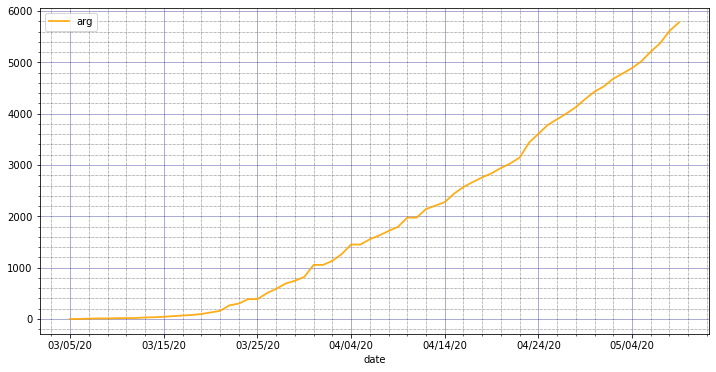

In [137]:
plt.rcParams["figure.figsize"]=12,6
fig, ax1 = plt.subplots()

rr.plot(kind='line', x='date', y='arg', ax=ax1, alpha=0.9, lw=1.8, color='orange')

ax1.set_axisbelow(True)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', alpha=0.65, linewidth='0.5', color='navy')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()  # Correct number of positives